In [12]:
import numpy as np
import matplotlib.pyplot as plt

EMPTY, WALL, TARGET1, TARGET2, AGENT1, AGENT2 = range(6)
ACTIONS = [0, 1, 2, 3, 4]  # NOOP, UP, DOWN, LEFT, RIGHT

COLORS = {
    EMPTY: [1.0, 1.0, 1.0],
    WALL: [0.0, 0.0, 0.0],
    TARGET1: [0.0, 0.5, 0.0],
    TARGET2: [0.5, 0.0, 0.0],
    AGENT1: [0.5, 1.0, 0.5],
    AGENT2: [1.0, 0.5, 0.5],
}

ACTION_EFFECTS = {
    0: (0, 0),
    1: (-1, 0),
    2: (1, 0),
    3: (0, -1),
    4: (0, 1),
}

class GridworldEnv:
    def __init__(self, grid_map):
        self.grid_map = np.array(grid_map, dtype=int)
        self.agents_start_coords, self.agents_target_coords = self._find_agents_and_targets()
        self.current_agents_coords = np.copy(self.agents_start_coords)
        self.move_completed = [False, False]
        self.current_game_state = self._get_state()

    def reset(self):
        self.current_agents_coords = np.copy(self.agents_start_coords)
        self.move_completed = [False, False]
        self.current_game_state = self._get_state()
        return self.current_game_state

    def step(self, actions):
        rewards = [0.0, 0.0]
        new_agent_coords = np.copy(self.current_agents_coords)

        for agent_idx, action in enumerate(actions):
            if self.move_completed[agent_idx]:
                continue

            dy, dx = ACTION_EFFECTS[action]
            y, x = self.current_agents_coords[agent_idx]
            new_y, new_x = y + dy, x + dx

            if not self._move_legal(new_y, new_x, agent_idx):
                rewards[agent_idx] = -0.1
                continue

            if self._target_reached(agent_idx, new_y, new_x):
                self.move_completed[agent_idx] = True
                rewards[agent_idx] = 100.0
            else:
                rewards[agent_idx] = -0.1

            new_agent_coords[agent_idx] = [new_y, new_x]

        self.current_agents_coords = new_agent_coords
        self.current_game_state = self._get_state()
        done = all(self.move_completed)

        return self.current_game_state, rewards, done

    def render(self):
        img = self._gridmap_to_image()
        plt.imshow(img)
        plt.show()

    def _within_bounds(self, y, x):
        return 0 <= y < self.grid_map.shape[0] and 0 <= x < self.grid_map.shape[1]

    def _move_legal(self, y, x, agent_idx):
        if not self._within_bounds(y, x) or self.grid_map[y, x] == WALL:
            return False

        if agent_idx == 0 and self.grid_map[y, x] == AGENT2:
            return False

        if agent_idx == 1 and self.grid_map[y, x] == AGENT1:
            return False

        return True

    def _target_reached(self, agent_idx, y, x):
        target = TARGET1 if agent_idx == 0 else TARGET2
        return self.grid_map[y, x] == target

    def _find_agents_and_targets(self):
        start_coords = []
        target_coords = []
        for agent, target in [(AGENT1, TARGET1), (AGENT2, TARGET2)]:
            sy, sx = np.where(self.grid_map == agent)
            ty, tx = np.where(self.grid_map == target)
            start_coords.append([sy[0], sx[0]])
            target_coords.append([ty[0], tx[0]])
        return np.array(start_coords), np.array(target_coords)

    def _get_state(self):
        return np.concatenate([self.current_agents_coords.flatten(), self.move_completed])

    def _gridmap_to_image(self):
        img = np.zeros((*self.grid_map.shape, 3))
        for i in range(self.grid_map.shape[0]):
            for j in range(self.grid_map.shape[1]):
                img[i, j] = COLORS[self.grid_map[i, j]]

        for idx, (y, x) in enumerate(self.current_agents_coords):
            img[y, x] = COLORS[idx]

        return img


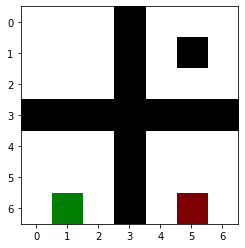

In [14]:
# Create an instance of the environment
grid_map = [
    [EMPTY, EMPTY, EMPTY, WALL, EMPTY, EMPTY, EMPTY],
    [EMPTY, AGENT1, EMPTY, WALL, EMPTY, AGENT2, EMPTY],
    [EMPTY, EMPTY, EMPTY, WALL, EMPTY, EMPTY, EMPTY],
    [WALL, WALL, WALL, WALL, WALL, WALL, WALL],
    [EMPTY, EMPTY, EMPTY, WALL, EMPTY, EMPTY, EMPTY],
    [EMPTY, EMPTY, EMPTY, WALL, EMPTY, EMPTY, EMPTY],
    [EMPTY, TARGET1, EMPTY, WALL, EMPTY, TARGET2, EMPTY],
]
env = GridworldEnv(grid_map)

# Reset the environment and get the initial state
state = env.reset()

# Render the initial state
env.render()


In [18]:
import numpy as np
import matplotlib.pyplot as plt

EMPTY, WALL, TARGET1, TARGET2, AGENT1, AGENT2 = range(6)
ACTIONS = [0, 1, 2, 3, 4]  # NOOP, UP, DOWN, LEFT, RIGHT

COLORS = {
    EMPTY: [1.0, 1.0, 1.0],  # White
    WALL: [0.0, 0.0, 0.0],  # Black
    TARGET1: [0.0, 0.5, 0.0],  # Dark Green
    TARGET2: [0.5, 0.0, 0.0],  # Dark Red
    AGENT1: [0.5, 1.0, 0.5],  # Light Green
    AGENT2: [1.0, 0.5, 0.5],  # Light Red
}

ACTION_EFFECTS = {
    0: (0, 0),
    1: (-1, 0),
    2: (1, 0),
    3: (0, -1),
    4: (0, 1),
}

class GridworldEnv:
    def __init__(self, grid_map):
        self.grid_map = np.array(grid_map, dtype=int)
        self.agents_start_coords, self.agents_target_coords = self._find_agents_and_targets()
        self.current_agents_coords = np.copy(self.agents_start_coords)
        self.move_completed = [False, False]
        self.current_game_state = self._get_state()

    def reset(self):
        self.current_agents_coords = np.copy(self.agents_start_coords)
        self.move_completed = [False, False]
        self.current_game_state = self._get_state()
        return self.current_game_state

    def step(self, actions):
        rewards = [0.0, 0.0]
        new_agent_coords = np.copy(self.current_agents_coords)

        for agent_idx, action in enumerate(actions):
            if self.move_completed[agent_idx]:
                continue

            dy, dx = ACTION_EFFECTS[action]
            y, x = self.current_agents_coords[agent_idx]
            new_y, new_x = y + dy, x + dx

            if not self._move_legal(new_y, new_x, agent_idx):
                rewards[agent_idx] = -0.1
                continue

            if self._target_reached(agent_idx, new_y, new_x):
                self.move_completed[agent_idx] = True
                rewards[agent_idx] = 100.0
            else:
                rewards[agent_idx] = -0.1

            new_agent_coords[agent_idx] = [new_y, new_x]

        self.current_agents_coords = new_agent_coords
        self.current_game_state = self._get_state()
        done = all(self.move_completed)

        return self.current_game_state, rewards, done

    def render(self):
        img = self._gridmap_to_image()
        plt.imshow(img)
        plt.show()

    def _within_bounds(self, y, x):
        return 0 <= y < self.grid_map.shape[0] and 0 <= x < self.grid_map.shape[1]

    def _move_legal(self, y, x, agent_idx):
        if not self._within_bounds(y, x) or self.grid_map[y, x] == WALL:
            return False

        if agent_idx == 0 and self.grid_map[y, x] == AGENT2:
            return False

        if agent_idx == 1 and self.grid_map[y, x] == AGENT1:
            return False

        return True

    def _target_reached(self, agent_idx, y, x):
        target = TARGET1 if agent_idx == 0 else TARGET2
        return self.grid_map[y, x] == target

    def _find_agents_and_targets(self):
        start_coords = []
        target_coords = []
        for agent, target in [(AGENT1, TARGET1), (AGENT2, TARGET2)]:
            sy, sx = np.where(self.grid_map == agent)
            ty, tx = np.where(self.grid_map == target)
            start_coords.append([sy[0], sx[0]])
            target_coords.append([ty[0], tx[0]])
        return np.array(start_coords), np.array(target_coords)

    def _get_state(self):
        return np.concatenate([self.current_agents_coords.flatten(), self.move_completed])

    def _gridmap_to_image(self):
        img = np.zeros((*self.grid_map.shape, 3))
        for i in range(self.grid_map.shape[0]):
            for j in range(self.grid_map.shape[1]):
                if self.grid_map[i, j] == EMPTY:
                    img[i, j] = COLORS[EMPTY]  # Change EMPTY to WALL color (black)
                else:
                    img[i, j] = COLORS[self.grid_map[i, j]]

        for idx, (y, x) in enumerate(self.current_agents_coords):
            img[y, x] = COLORS[idx]

        return img


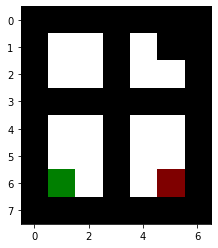

In [19]:
grid_map = [
    [WALL, WALL, WALL, WALL, WALL, WALL, WALL],
    [WALL, EMPTY, AGENT1, WALL, EMPTY, AGENT2, WALL],
    [WALL, EMPTY, EMPTY, WALL, EMPTY, EMPTY, WALL],
    [WALL, WALL, WALL, WALL, WALL, WALL, WALL],
    [WALL, EMPTY, EMPTY, WALL, EMPTY, EMPTY, WALL],
    [WALL, EMPTY, EMPTY, WALL, EMPTY, EMPTY, WALL],
    [WALL, TARGET1, EMPTY, WALL, EMPTY, TARGET2, WALL],
    [WALL, WALL, WALL, WALL, WALL, WALL, WALL],
]

env = GridworldEnv(grid_map)
state = env.reset()
env.render()
